In [1]:
import geopandas as gpd
from shapely.geometry.point import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from shapely import affinity

%load_ext autoreload
%autoreload 2
sns.set()
%matplotlib inline

In [3]:
from ssalib2 import SpatialSoccer
sa = SpatialSoccer()

# Load Games

In [4]:
games = sa.get_match_list_from_source("nfl\games.csv",SpatialSoccer.NFL_DATA)
vars(games[0])

{'match_id': 2018090600,
 'home_team_id': 'PHI',
 'home_team_name': 'PHI',
 'home_team_score': 0,
 'away_team_id': 'ATL',
 'away_team_name': 'ATL',
 'away_team_score': 0,
 'season_id': 0,
 'season_name': '',
 'kick_off': '',
 'match_date': '',
 'match_date_time': datetime.datetime(2018, 9, 6, 20, 20),
 'events': [],
 'home_players': [],
 'away_players': [],
 'week': 1}

# Load Events from Games (plays)

X and Y data is tricky here since there isn't really a measure of the start of the play and end of the play. What I've done is placed all events in the middle of the y axis and then add then find the absolute yard line. As a warning, this does not really work well.

In [5]:
#Loads the plays from the first game between Phi and Atl
df = sa.load_events_from_match("nfl/plays.csv",SpatialSoccer.NFL_DATA,games[0])
df.head()

,start_x,start_y,end_x,end_y,is_goal,period,match_id,xg,event_id,event_name,...,event_player,possession_id,timestamp,body_part,tags,original_json,event_time,start_point,end_point,geometry
0,100.0,0.0,110.0,0.0,None,1,2018090600,None,75,play_type_pass,...,,1,None,None,None,"{'gameId': 2018090600, 'playId': 75, 'playDesc...",None,POINT (100 0),POINT (110 0),POINT (100.00000 0.00000)
1,59.0,0.0,59.0,0.0,None,1,2018090600,None,146,play_type_pass,...,,1,None,None,None,"{'gameId': 2018090600, 'playId': 146, 'playDes...",None,POINT (59 0),POINT (59 0),POINT (59.00000 0.00000)
2,59.0,0.0,59.0,0.0,None,1,2018090600,None,168,play_type_pass,...,,2,None,None,None,"{'gameId': 2018090600, 'playId': 168, 'playDes...",None,POINT (59 0),POINT (59 0),POINT (59.00000 0.00000)
3,59.0,0.0,92.0,0.0,None,1,2018090600,None,190,play_type_pass,...,,3,None,None,None,"{'gameId': 2018090600, 'playId': 190, 'playDes...",None,POINT (59 0),POINT (92 0),POINT (59.00000 0.00000)
4,21.0,0.0,21.0,0.0,None,1,2018090600,None,256,play_type_pass,...,,3,None,None,None,"{'gameId': 2018090600, 'playId': 256, 'playDes...",None,POINT (21 0),POINT (21 0),POINT (21.00000 0.00000)


# Load Tracking Data for a game during a given game week

In [6]:
gdf = sa.load_nfl_tracking("nfl",games[0])

## Plot on a field

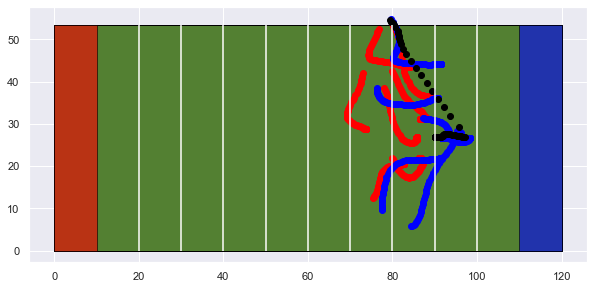

In [15]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
SpatialSoccer.build_plot_field_nfl(ax)
gdf[(gdf['playId']==75)&(gdf['team']=='home')].plot(ax=ax,color="red")
gdf[(gdf['playId']==75)&(gdf['team']=='away')].plot(ax=ax,color="blue")
gdf[(gdf['playId']==75)&(gdf['position']=="Ball")].plot(ax=ax,color="Black");